<a href="https://colab.research.google.com/github/Sidhartht1607/flight-delay-risk-system/blob/main/flight_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ✈️ Flight Delay Analytics & Prediction (Q1 2025)

### Goal
Build a machine learning model to predict whether a flight will be delayed (≥15 minutes) using U.S. DOT flight data for January–March 2025. Alongside prediction, uncover operational patterns, root causes of delays, and propose data-driven recommendations for airline performance optimization.

### Key Business Questions
1. Which airports, routes, and carriers show highest disruption risk?
2. What operational and scheduling factors most contribute to delays?
3. Can we predict flight delay risk ahead of departure time?
4. What recurring patterns exist in Q1 flight delay trends?
5. Which changes could improve on-time performance?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_jan=pd.read_csv("flight_jan.csv")

## Importing data from Bureau of Transportation Statistics

In [3]:
df_jan.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP',
       'DEP_TIME_BLK', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP',
       'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS',
       'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [4]:
df_feb=pd.read_csv("flight_feb.csv")
df_feb.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP',
       'DEP_TIME_BLK', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP',
       'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS',
       'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [5]:
df_mar=pd.read_csv("flight_mar.csv")
df_mar.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP',
       'DEP_TIME_BLK', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP',
       'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS',
       'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [6]:
print(set(df_jan.columns) - set(df_feb.columns))
print(set(df_feb.columns) - set(df_jan.columns))
print(set(df_jan.columns) - set(df_mar.columns))
print(set(df_mar.columns) - set(df_jan.columns))

set()
set()
set()
set()


In [7]:
df_jan['FL_DATE'].describe()

,FL_DATE
count,110405
unique,6
top,1/5/2025 12:00:00 AM
freq,19676


Let join all the tables

In [8]:
df = pd.concat([df_jan,df_feb,df_mar],ignore_index=True)

In [9]:
df['FL_DATE'].max(),df['FL_DATE'].min()

('3/5/2025 12:00:00 AM', '1/1/2025 12:00:00 AM')

In [10]:
df_jan['DAY_OF_MONTH'].max(),df_feb['DAY_OF_MONTH'].max(),df_mar['DAY_OF_MONTH'].max()

(6, 6, 5)

In [11]:
df['FL_DATE']=pd.to_datetime(df['FL_DATE'])

/tmp/ipython-input-2801850585.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FL_DATE']=pd.to_datetime(df['FL_DATE'])


In [12]:
df['FL_DATE'].max(), df['FL_DATE'].min()


(Timestamp('2025-03-05 00:00:00'), Timestamp('2025-01-01 00:00:00'))

### Sanity checks





In [13]:
df['MONTH'].value_counts()

,count
MONTH,
1,110405
3,85397
2,85387


In [14]:
df.FL_DATE.dtype #object type

dtype('<M8[ns]')

In [15]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP',
       'DEP_TIME_BLK', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP',
       'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS',
       'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [16]:
df = df.rename(columns={"DAY_OF_MONTH": "DAY"})

In [17]:
df.columns = df.columns.str.lower()

In [18]:
df.columns

Index(['year', 'quarter', 'month', 'day', 'fl_date', 'op_unique_carrier',
       'op_carrier', 'origin', 'origin_city_name', 'origin_state_abr',
       'origin_state_nm', 'dest', 'dest_city_name', 'dest_state_abr',
       'dest_state_nm', 'crs_dep_time', 'dep_time', 'dep_delay',
       'dep_delay_new', 'dep_del15', 'dep_delay_group', 'dep_time_blk',
       'taxi_out', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'arr_delay_new', 'arr_del15', 'arr_delay_group', 'arr_time_blk',
       'cancelled', 'cancellation_code', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'distance_group', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [19]:
df["flight_date"] = pd.to_datetime(
    df[["year", "month", "day"]]
)

In [20]:
df.groupby("month")['day'].max()

,day
month,
1,6
2,6
3,5


In [21]:
df.columns

Index(['year', 'quarter', 'month', 'day', 'fl_date', 'op_unique_carrier',
       'op_carrier', 'origin', 'origin_city_name', 'origin_state_abr',
       'origin_state_nm', 'dest', 'dest_city_name', 'dest_state_abr',
       'dest_state_nm', 'crs_dep_time', 'dep_time', 'dep_delay',
       'dep_delay_new', 'dep_del15', 'dep_delay_group', 'dep_time_blk',
       'taxi_out', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'arr_delay_new', 'arr_del15', 'arr_delay_group', 'arr_time_blk',
       'cancelled', 'cancellation_code', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'distance_group', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'flight_date'],
      dtype='object')

In [22]:
df.drop(columns=["fl_date"], inplace=True)

### 1. Delay characterizations


### Donut function

In [23]:
#piechart function
def plot_donut(data,cols=['r','b'],explode=(0.05,0.1),labels=['not_cancelled','cancelled'], title=''):
  explode = (0.05, 0.1)
  plt.pie(data, colors=['r','b'], labels=labels,
          autopct='%1.1f%%', pctdistance=0.85,
          explode=explode)

  # draw circle
  centre_circle = plt.Circle((0, 0), 0.70, fc='white')
  fig = plt.gcf()

  # Adding Circle in Pie chart
  fig.gca().add_artist(centre_circle)

  # Adding Title of chart
  plt.title(title)

  # Displaying Chart
  plt.show()

Cancelled flights percentage

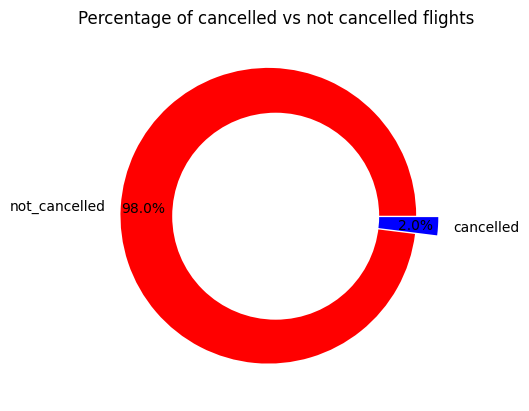

In [24]:
cancelled_flights = df['cancelled'].mean() * 100
not_cancelled_flights = 100 - cancelled_flights
not_cancelled_flights, cancelled_flights

plot_donut([not_cancelled_flights,cancelled_flights],title="Percentage of cancelled vs not cancelled flights")

We checked the number of flights that are cancelled because we might get a lot missing values because the cancelled flights are there. Lets check diverted flights as well

Diverted_flights percentage

99.7162030961602 0.28379690383979345


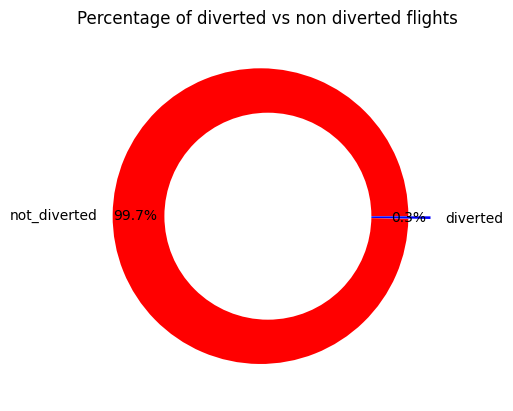

In [25]:
diverted_flights=df['diverted'].mean()*100
not_diverted_flights = 100 - diverted_flights
print(not_diverted_flights, diverted_flights)

plot_donut(data=[not_diverted_flights,diverted_flights],labels=['not_diverted','diverted'],title="Percentage of diverted vs non diverted flights")

Lets check how these cancelled flights are affecting other columns. I suspect the data would be null.

In [26]:
print("cancelled_total",len(df[df['cancelled']==1])) ## there are about 30640 cancelled flight in 3 months
df_cancelled=df[df['cancelled']==1]

cancelled_total 5543


In [27]:
df_1=df[(df['dep_del15'].isna()) & (df['cancelled']==1)]
print("number of late departures by 15 mins: ",len(df_1))

number of late departures by 15 mins:  5395


Here it shows that there are about 29671 flights that have not departed which makes sense but the problem is that this should be the same as the number of cancelled flights. We can assume that the the flight had departed and then got cancelled.

	•	DEP_TIME confirms whether departure was initiated
	•	DEP_DELAY quantifies how late that initiation occurred
	•	TAXI_OUT shows whether the aircraft progressed beyond gate departure

In [28]:
print("cancelled_total",len(df[df['cancelled']==1])) ## there are about 30640 cancelled flight in 3 months
df_cancelled=df[df['cancelled']==1]
df_1=df[(df['dep_del15'].isna()) & (df['cancelled']==1)]
print("number of late departures by 15 mins and cancelled: ",len(df_1))
print("dep_delay cancelled and deptime15 is na: ",df_1['dep_delay'].isna().sum())
print("dep_time cancelled and deptime15 is na: ",df_1['dep_time'].isna().sum())
print("taxi_out cancelled and deptime15 is na: ",df_1['taxi_out'].isna().sum())
print("dep_delay and cancelled: ",df_cancelled['dep_delay'].isna().sum())
print("dep_time and cancelled: ",df_cancelled['dep_time'].isna().sum())
print("taxi_out_cancelled: ",df_cancelled['taxi_out'].isna().sum())

cancelled_total 5543
number of late departures by 15 mins and cancelled:  5395
dep_delay cancelled and deptime15 is na:  5395
dep_time cancelled and deptime15 is na:  5371
taxi_out cancelled and deptime15 is na:  5395
dep_delay and cancelled:  5395
dep_time and cancelled:  5371
taxi_out_cancelled:  5489


In [29]:
#Number of flights where the departure began but got cancelled:
print("Number of flights where the taxing began but got cancelled",len(df[df['cancelled']==1])-df_cancelled['taxi_out'].isna().sum())
print("Number of flights where the departure from gate began but got cancelled",len(df[df['cancelled']==1])-df_cancelled['dep_time'].isna().sum())
print("Number of flights where the departure from gate was delayed but got cancelled",len(df[df['cancelled']==1])-df_cancelled['dep_delay'].isna().sum())

Number of flights where the taxing began but got cancelled 54
Number of flights where the departure from gate began but got cancelled 172
Number of flights where the departure from gate was delayed but got cancelled 148


Because the delay events are not measured normally when the flights have been cancelled itself we will remove them for now. It can happen to any number of factors for example weather problems or operation/technical discrepencies

In [30]:
(df['dep_del15'].isna()).sum()

np.int64(5396)

In [31]:
len(df[(df['dep_del15'].isna()) & (df['cancelled']==1)])

5395

 What percentage of flights are delayed at departure?

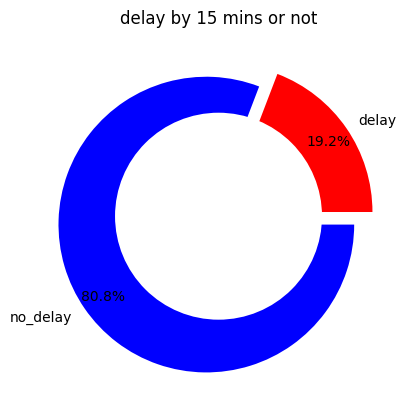

In [32]:
delay_rate = df['dep_del15'].mean() * 100
on_time_rate = 100 - delay_rate

data=delay_rate, on_time_rate
plot_donut(data,labels=["delay","no_delay"],title="delay by 15 mins or not")

In [33]:
df_flight_unique=df_cancelled.groupby(['flight_date'])['cancelled'].sum()

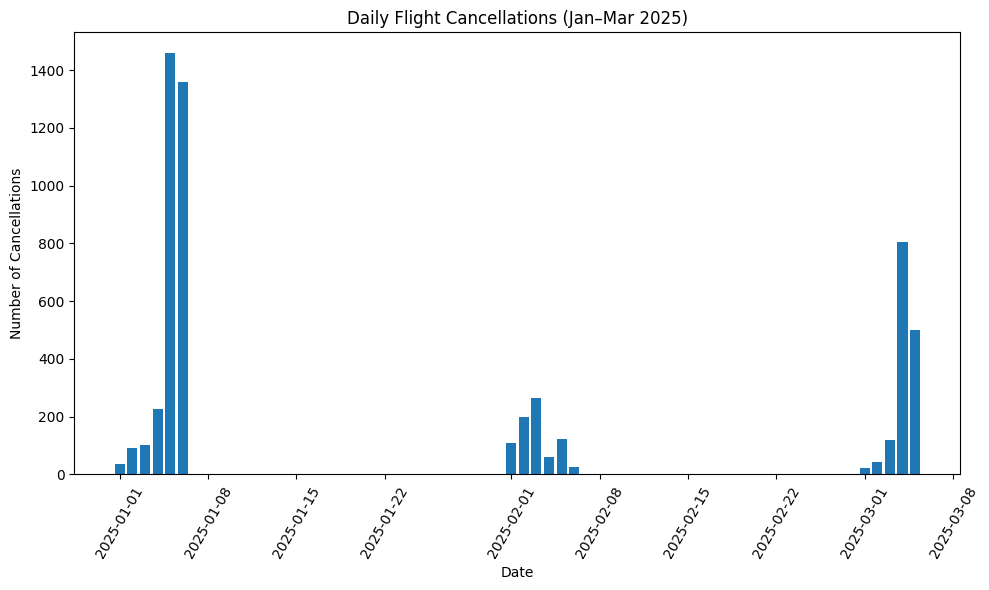

In [34]:
plt.figure(figsize=(10,6))
plt.bar(df_flight_unique.sort_index().index,df_flight_unique.values)
plt.title("Daily Flight Cancellations (Jan–Mar 2025)")
plt.xlabel("Date")
plt.ylabel("Number of Cancellations")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

This shows that there are more cancellations at the beginning of the year. Maybe because people are getting back from holidays and the bad weather conditions during those times.

In [35]:
df_cancelled['origin'].value_counts()

,count
origin,
DFW,639
DCA,389
MCI,243
ORD,202
CLT,198
...,...
XWA,1
RDD,1
ADQ,1


In [36]:
df_most_can_org=df_cancelled.groupby(["flight_date",'origin'])['cancelled'].count()
df_most_can_org=df_most_can_org.reset_index(name='num_cancelled')
max_cancel_per_day=df_most_can_org.sort_values(by=['flight_date','num_cancelled'],ascending=[True,False]).groupby("flight_date").first()
max_cancel_per_day

,origin,num_cancelled
flight_date,,
2025-01-01,DEN,6
2025-01-02,SAN,17
2025-01-03,SAN,30
2025-01-04,DEN,39
2025-01-05,DFW,196
2025-01-06,DCA,246
2025-02-01,CLT,15
2025-02-02,SEA,26
2025-02-03,SEA,34


In [37]:
max_cancel_per_day['perc_of_daily_cxl'] = (
    max_cancel_per_day['num_cancelled'] /
    df_cancelled.groupby('flight_date')['cancelled'].count()
) * 100

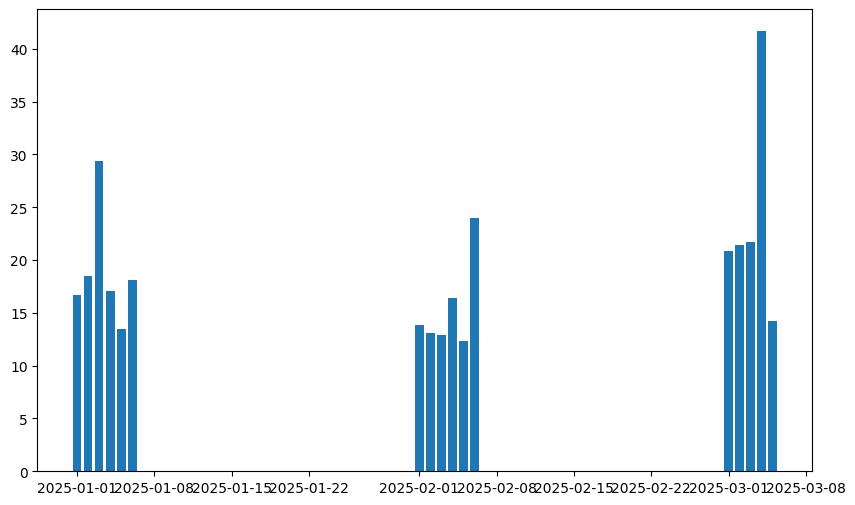

In [38]:
plt.figure(figsize=(10,6))
plt.bar(max_cancel_per_day.index,max_cancel_per_day['perc_of_daily_cxl'])
plt.show()

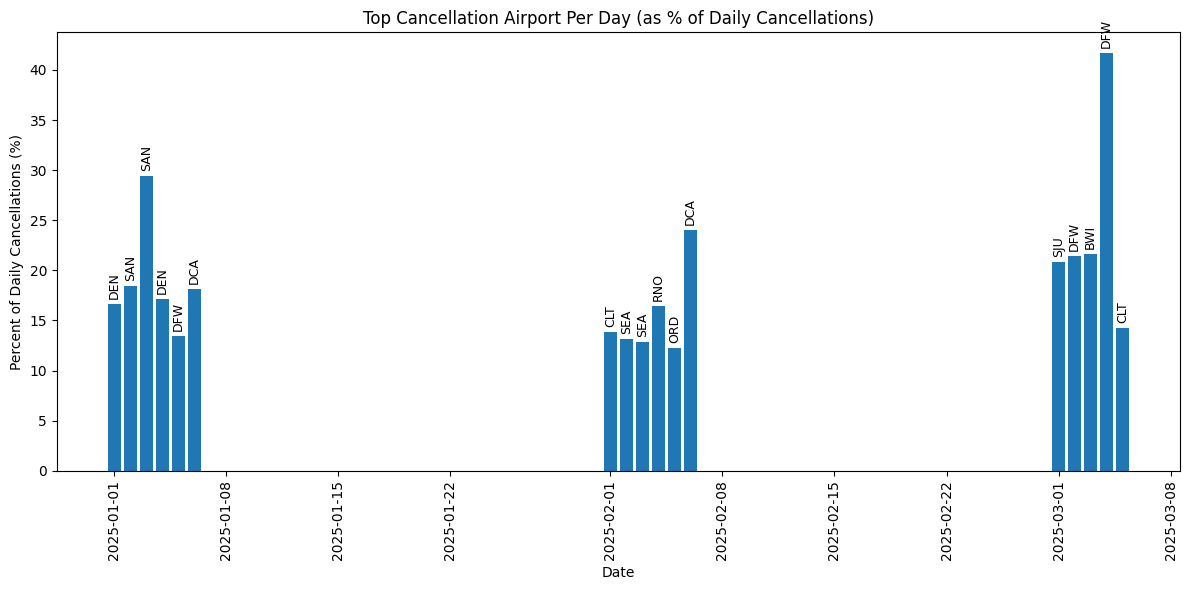

In [39]:
plt.figure(figsize=(12,6))
bars = plt.bar(
    max_cancel_per_day.index,
    max_cancel_per_day['perc_of_daily_cxl']
)

# Add text labels for origin
for bar, label in zip(bars, max_cancel_per_day['origin']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.5,
        label,
        ha='center',
        va='bottom',
        fontsize=9,
        rotation=90
    )

plt.title("Top Cancellation Airport Per Day (as % of Daily Cancellations)")
plt.ylabel("Percent of Daily Cancellations (%)")
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

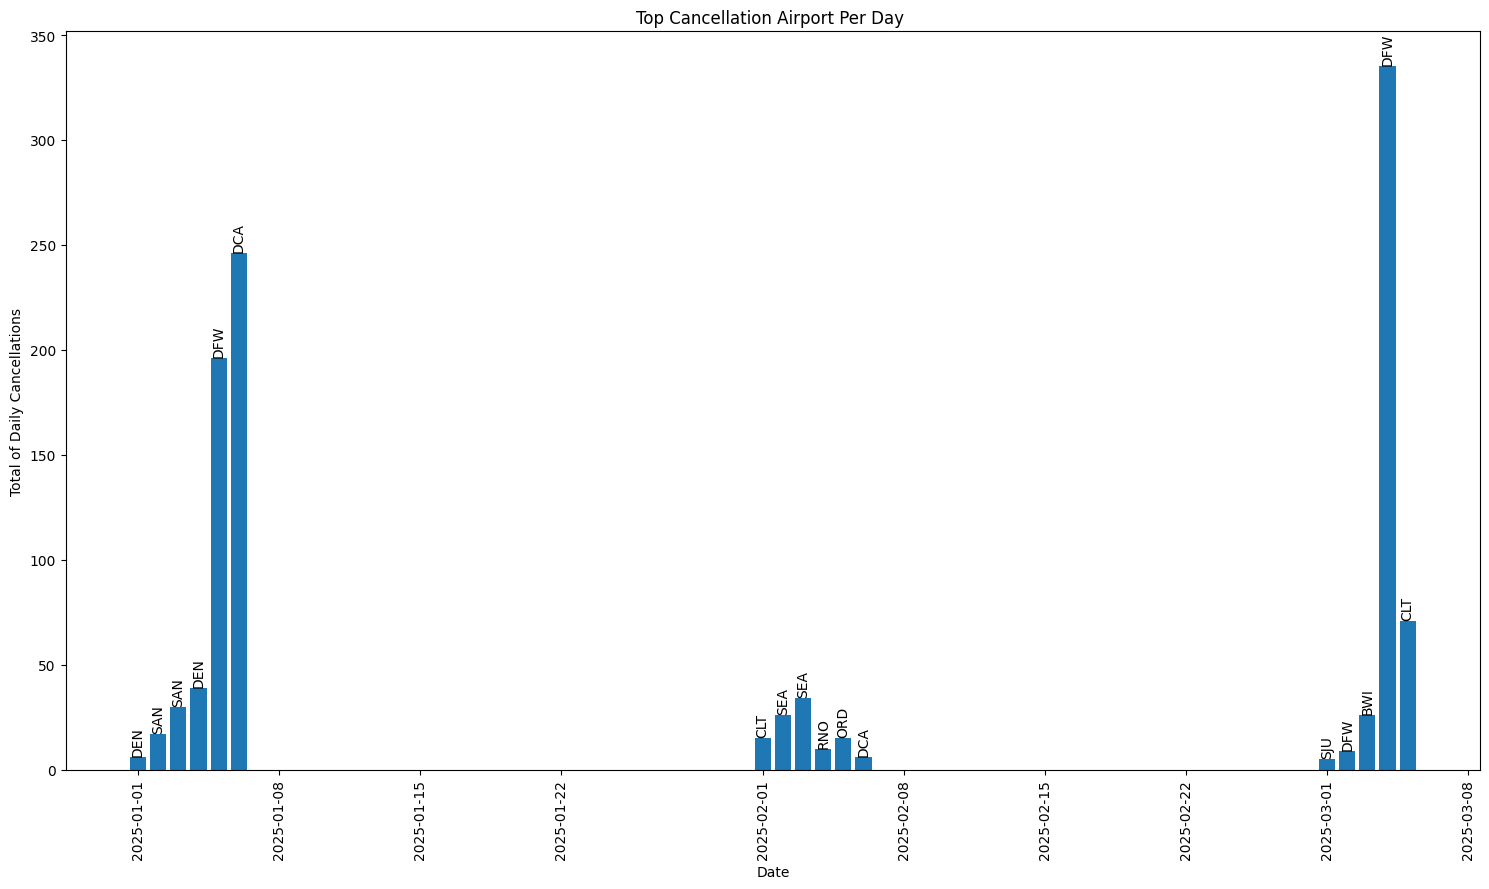

In [40]:
plt.figure(figsize=(15,9))
bar=plt.bar(max_cancel_per_day.index,max_cancel_per_day.num_cancelled)
for i in range(len(bar)):
  height=bar[i].get_height()
  plt.text(
      bar[i].get_x()+bar[i].get_width()/2,
      height+0.5,
      max_cancel_per_day.origin.iloc[i],
      ha="center",
      va="bottom",
      fontsize=10,
      rotation=90
  )
plt.title("Top Cancellation Airport Per Day ")
plt.ylabel("Total of Daily Cancellations")
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Lets remove the cancelled and diverted flights from our dataset

In [41]:
len(df)

281189

In [42]:
df_operation=df[(df['cancelled']!=1)& (df['diverted']!=1)]

In [43]:
op_del=df_operation[df_operation['dep_del15']==1].op_carrier.value_counts()
op_del

,count
op_carrier,
WN,10273
AA,7789
OO,7009
DL,6644
UA,5699
B6,2592
F9,2284
OH,2244
AS,1962


In [44]:
df.op_carrier.unique()

array(['AA', 'AS', 'B6', 'DL', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH', 'OO',
       'UA', 'WN', 'YX', nan], dtype=object)

In [45]:
op_del['AA'],df_operation.op_carrier.value_counts()['AA']

(np.int64(7789), np.int64(40014))

In [48]:
# 1. Keep only operational flights (no cancelled, no diverted)
df_operation = df[(df['cancelled'] != 1) & (df['diverted'] != 1)].copy()

# 2. Optionally drop rows with missing carrier codes (avoids NaN issues)
df_operation = df_operation[~df_operation['op_carrier'].isna()]

# 3. Delayed flights per carrier (numerator)
op_del = df_operation[df_operation['dep_del15'] == 1]['op_carrier'].value_counts()

# 4. Total flights per carrier (denominator)
p = df_operation['op_carrier'].value_counts()

# 5. Loop over carriers that actually have operational flights
for carrier in p.index:
    delayed = op_del.get(carrier, 0)   # 0 if this carrier has no delayed flights
    rate = delayed / p[carrier] * 100  # percentage
    print(carrier, rate)

WN 19.99844264050303
AA 19.46568700954666
DL 16.750705929810408
OO 21.353278089203023
UA 18.052519877094618
YX 8.227424749163879
MQ 14.692202462380303
B6 25.32734023842095
OH 22.310598528534502
AS 20.966018379995727
NK 18.635170603674542
F9 26.171651197433256
G4 24.540209159754777
HA 12.445095168374817


Which airports are causing the most departure delays?

In [49]:
p=df_operation.groupby(['origin'])['dep_del15'].sum().sort_values(ascending=False)
total=df_operation.groupby('origin')['origin'].count()
delay_rates = (p / total[p.index] * 100).sort_values(ascending=False)
delay_rates.to_frame(name="delay_rate (%)")
delay_rates

,0
origin,
SPI,60.000000
SCE,57.142857
TOL,50.000000
STC,46.153846
ASE,45.908184
...,...
LSE,0.000000
ADK,0.000000
PQI,0.000000


This shows that CKB has more delays. But it could also be because of less flights from there

To avoid misleading delay percentages at airports with very low flight volumes, we filtered out airports below the median total flight count. This removes airports whose limited operations inflate delay rates due to small sample sizes.

In [50]:
valid_airports = total[total > total.median()]

delay_rates_filtered = (p[valid_airports.index] / valid_airports) * 100
delay_rates_filtered.sort_values(ascending=False)

,0
origin,
ASE,45.908184
JAC,37.617555
EGE,36.408978
BZN,32.758621
HDN,30.733945
...,...
JNU,10.365854
KOA,10.098177
CRP,10.067114


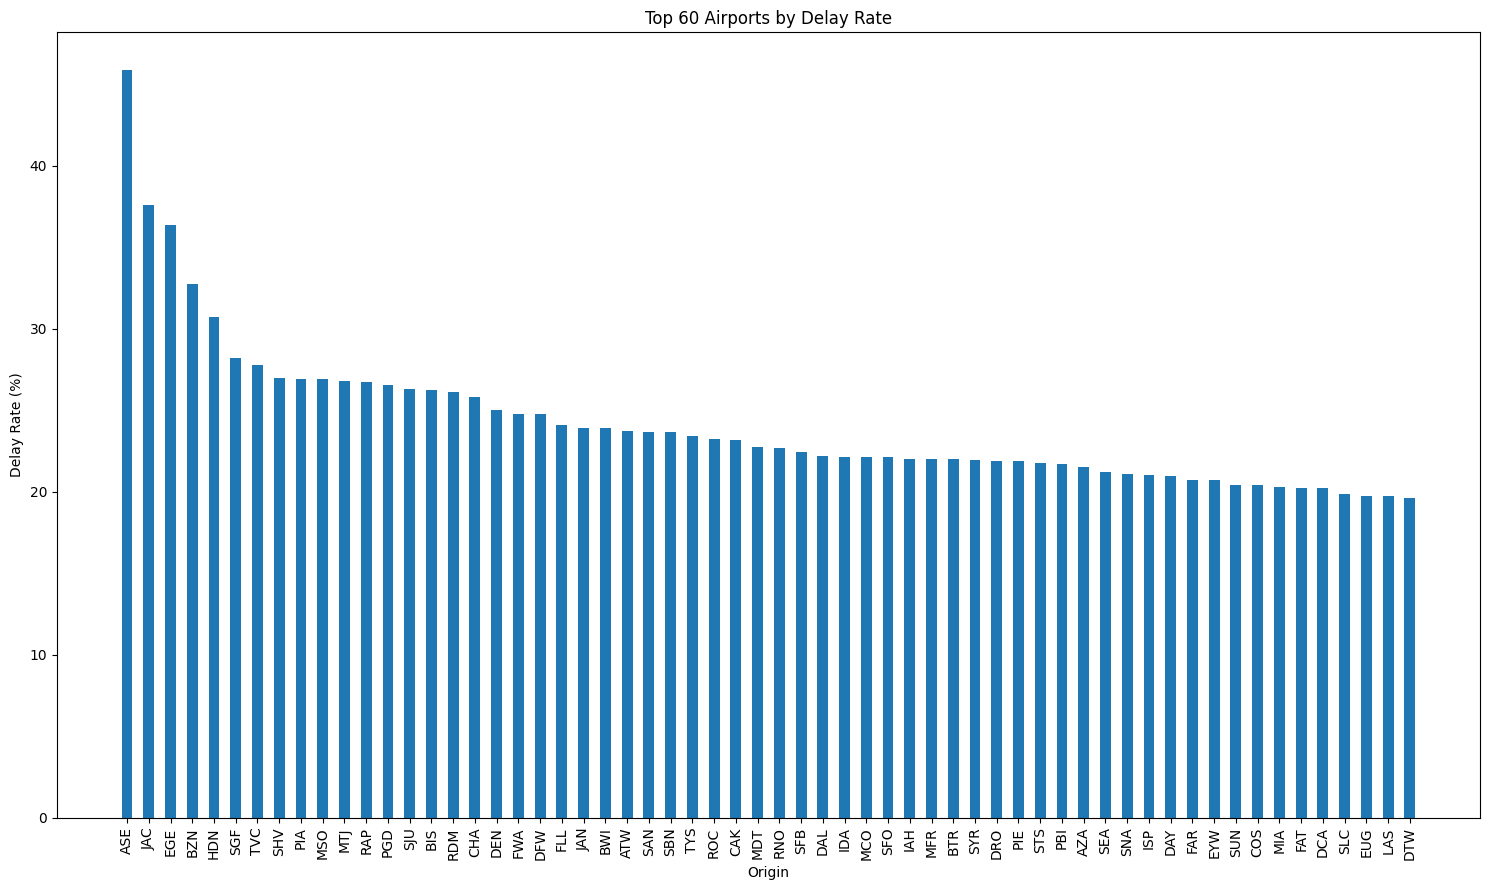

In [51]:
top_10=delay_rates_filtered.sort_values(ascending=False).head(60)
plt.figure(figsize=(15,9))
plt.bar(top_10.index,top_10.values,width=0.5)
plt.xlabel("Origin")
plt.ylabel("Delay Rate (%)")
plt.title("Top 60 Airports by Delay Rate")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Time-of-Day Delay Analysis

In [52]:
df_operation[['dep_time','arr_time']].head()

,dep_time,arr_time
0,452.0,733.0
1,552.0,832.0
2,815.0,1052.0
3,1029.0,1300.0
4,1707.0,2005.0


In [53]:
df_operation.columns

Index(['year', 'quarter', 'month', 'day', 'op_unique_carrier', 'op_carrier',
       'origin', 'origin_city_name', 'origin_state_abr', 'origin_state_nm',
       'dest', 'dest_city_name', 'dest_state_abr', 'dest_state_nm',
       'crs_dep_time', 'dep_time', 'dep_delay', 'dep_delay_new', 'dep_del15',
       'dep_delay_group', 'dep_time_blk', 'taxi_out', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'arr_delay_new', 'arr_del15',
       'arr_delay_group', 'arr_time_blk', 'cancelled', 'cancellation_code',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'distance_group', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'flight_date'],
      dtype='object')

In [54]:
df_operation[['crs_dep_time','crs_arr_time']].head()

,crs_dep_time,crs_arr_time
0,500.0,754.0
1,555.0,849.0
2,820.0,1114.0
3,1032.0,1323.0
4,1700.0,1948.0


In [55]:
df_operation.crs_dep_time.max(), df_operation.crs_dep_time.min()

(2359.0, 1.0)

In [60]:
df_operation['hour']=(df_operation.crs_dep_time//100)
x=df_operation.groupby('hour')['dep_del15'].mean() *100

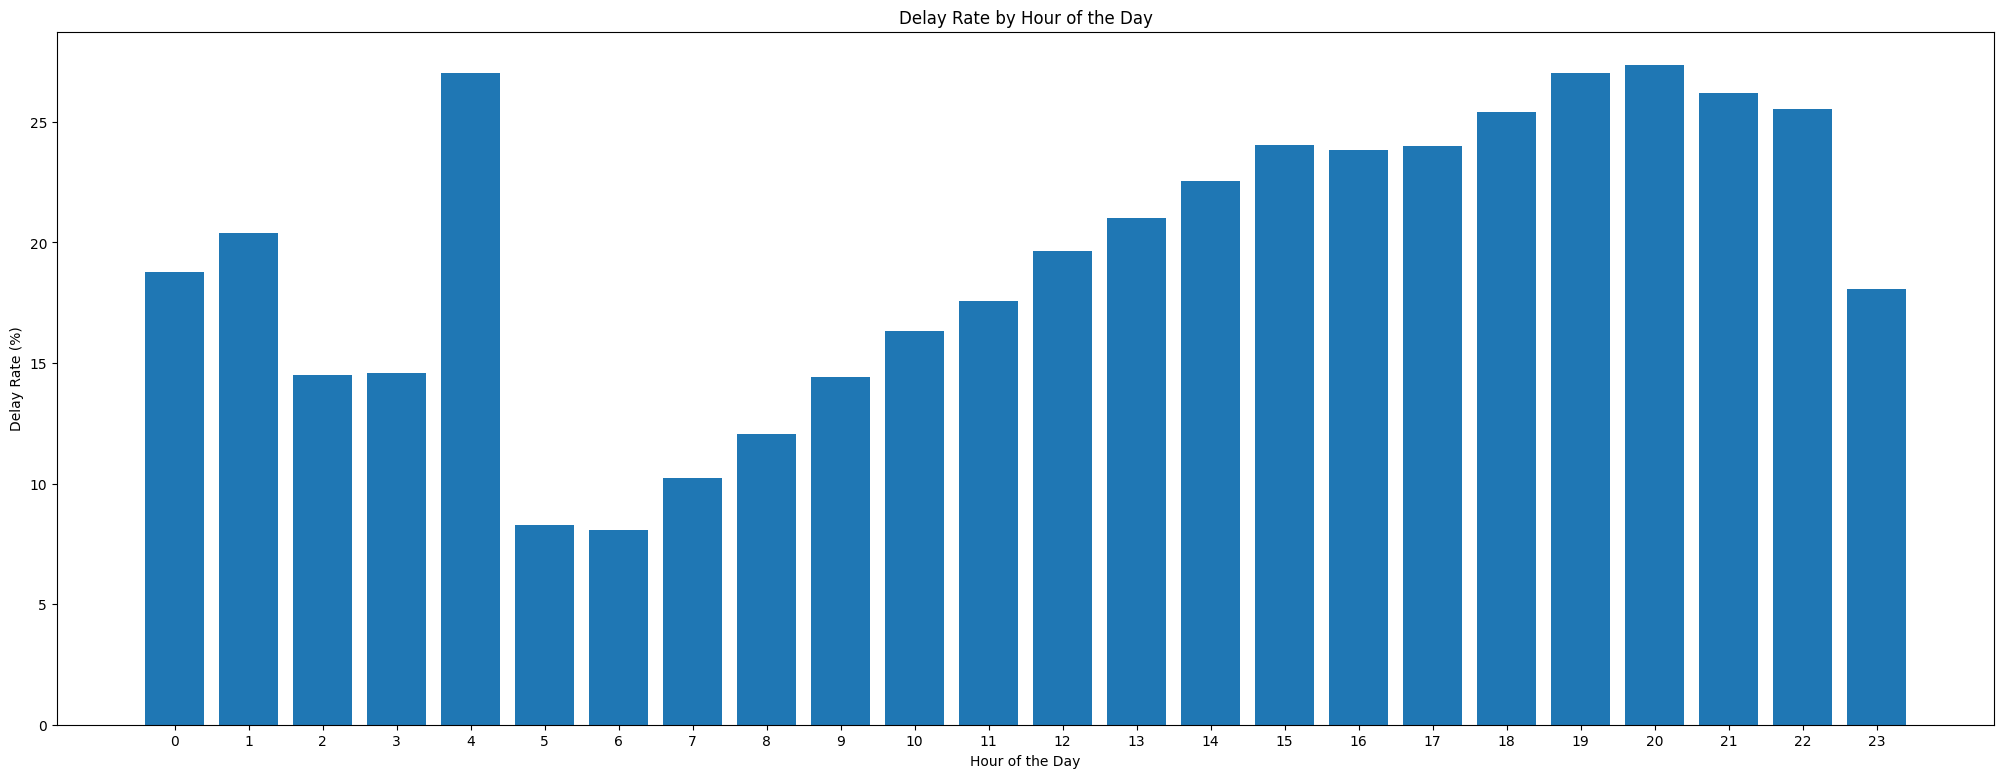

In [67]:
plt.figure(figsize=(25,9))
plt.bar(x.index,x.values)
plt.xticks(x.index)
plt.xlabel("Hour of the Day")
plt.ylabel("Delay Rate (%)")
plt.title("Delay Rate by Hour of the Day")
plt.show()